In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer,RobustScaler
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import svm
from ydata_profiling import ProfileReport
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,VotingRegressor,StackingRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [2]:
df=pd.read_csv('car.csv')
df.shape

(60109, 12)

In [3]:
df.head()

,Unnamed: 0,brand,currency,description,fuel_type,item_condition,manufacturer,mileage_from_odometer,model_date,price,vehicle_engine,vehicle_transmission
0,0,MG,PKR,MG HS 2021 for sale in Lahore,Petrol,used,MG,"6,000 km",2021.0,6525000.0,1490cc,Automatic
1,1,Toyota,PKR,Toyota Aygo 2012 for sale in Islamabad,Petrol,used,Toyota,"68,000 km",2012.0,1625000.0,1000cc,Manual
2,2,Honda,PKR,Honda City 2015 for sale in Lahore,Petrol,used,Honda,"150,000 km",2015.0,2550000.0,1300cc,Automatic
3,3,KIA,PKR,KIA Sorento 2022 for sale in Sialkot,Petrol,used,KIA,"18,000 km",2022.0,9000000.0,3500cc,Automatic
4,4,Toyota,PKR,Toyota Corolla 2015 for sale in Rawalpindi,Petrol,used,Toyota,"110,000 km",2015.0,3350000.0,1300cc,Automatic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60109 entries, 0 to 60108
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             60109 non-null  int64  
 1   brand                  60109 non-null  object 
 2   currency               60109 non-null  object 
 3   description            60109 non-null  object 
 4   fuel_type              60109 non-null  object 
 5   item_condition         60109 non-null  object 
 6   manufacturer           60109 non-null  object 
 7   mileage_from_odometer  60109 non-null  object 
 8   model_date             60109 non-null  float64
 9   price                  60109 non-null  float64
 10  vehicle_engine         60109 non-null  object 
 11  vehicle_transmission   60109 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.5+ MB


In [5]:
df.describe()

,Unnamed: 0,model_date,price
count,60109.000000,60109.000000,6.010900e+04
mean,30054.000000,2011.316425,3.603460e+06
std,17352.118002,9.459468,5.586388e+06
min,0.000000,1942.000000,1.780000e+03
25%,15027.000000,2006.000000,1.200000e+06
50%,30054.000000,2013.000000,2.300000e+06
75%,45081.000000,2019.000000,4.100000e+06
max,60108.000000,2023.000000,2.100000e+08


In [6]:

df=df.drop(['Unnamed: 0','currency','vehicle_engine'],axis=1)
df['description']=df['description'].str.split(' ',n=1).str[1]
df['model']=df['description'].str.extract(r'(\w+)') 
df['mileage_from_odometer']=df['mileage_from_odometer'].str.replace(',','')
df['mileage_from_odometer']=df['mileage_from_odometer'].str.extract(r'(\d+)').astype(int)
df['price']=df['price'].astype(int)
df=df.drop(['description','manufacturer'],axis=1) 
df=df.drop_duplicates()

df['model_date']=df['model_date'].astype(int)
df['price']=df['price'].astype(int)
df['mileage_from_odometer']=df['mileage_from_odometer'].astype(int)

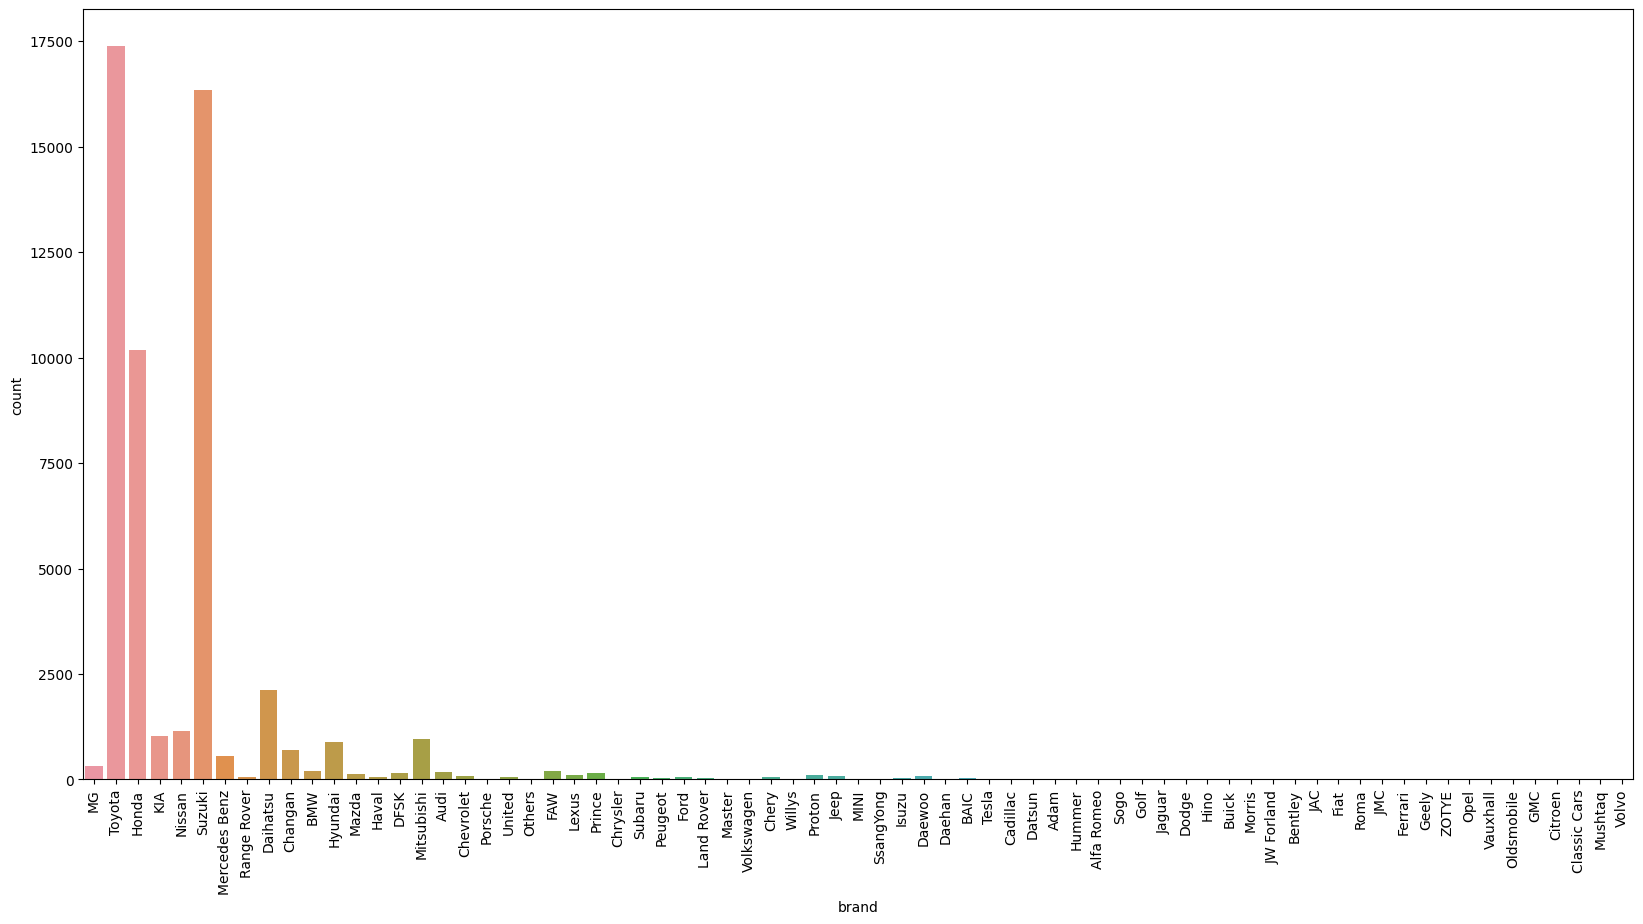

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='brand')
plt.xticks(rotation=90)
plt.show()
#conclusion toyota is the most common brand which is bought by people and then suzuki

<Axes: >

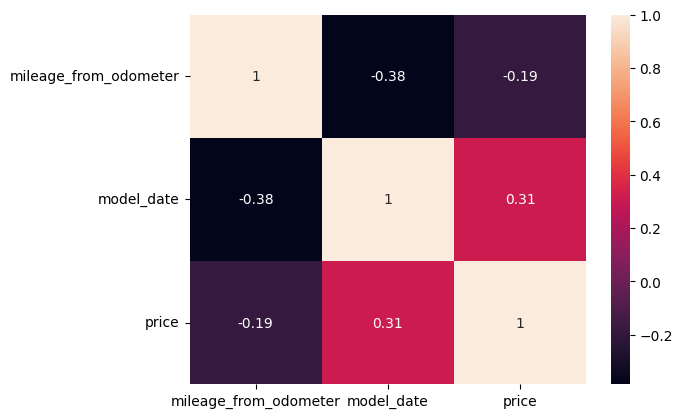

In [8]:
cor=df[['mileage_from_odometer','model_date','price']].corr()
sns.heatmap(cor,annot=True)

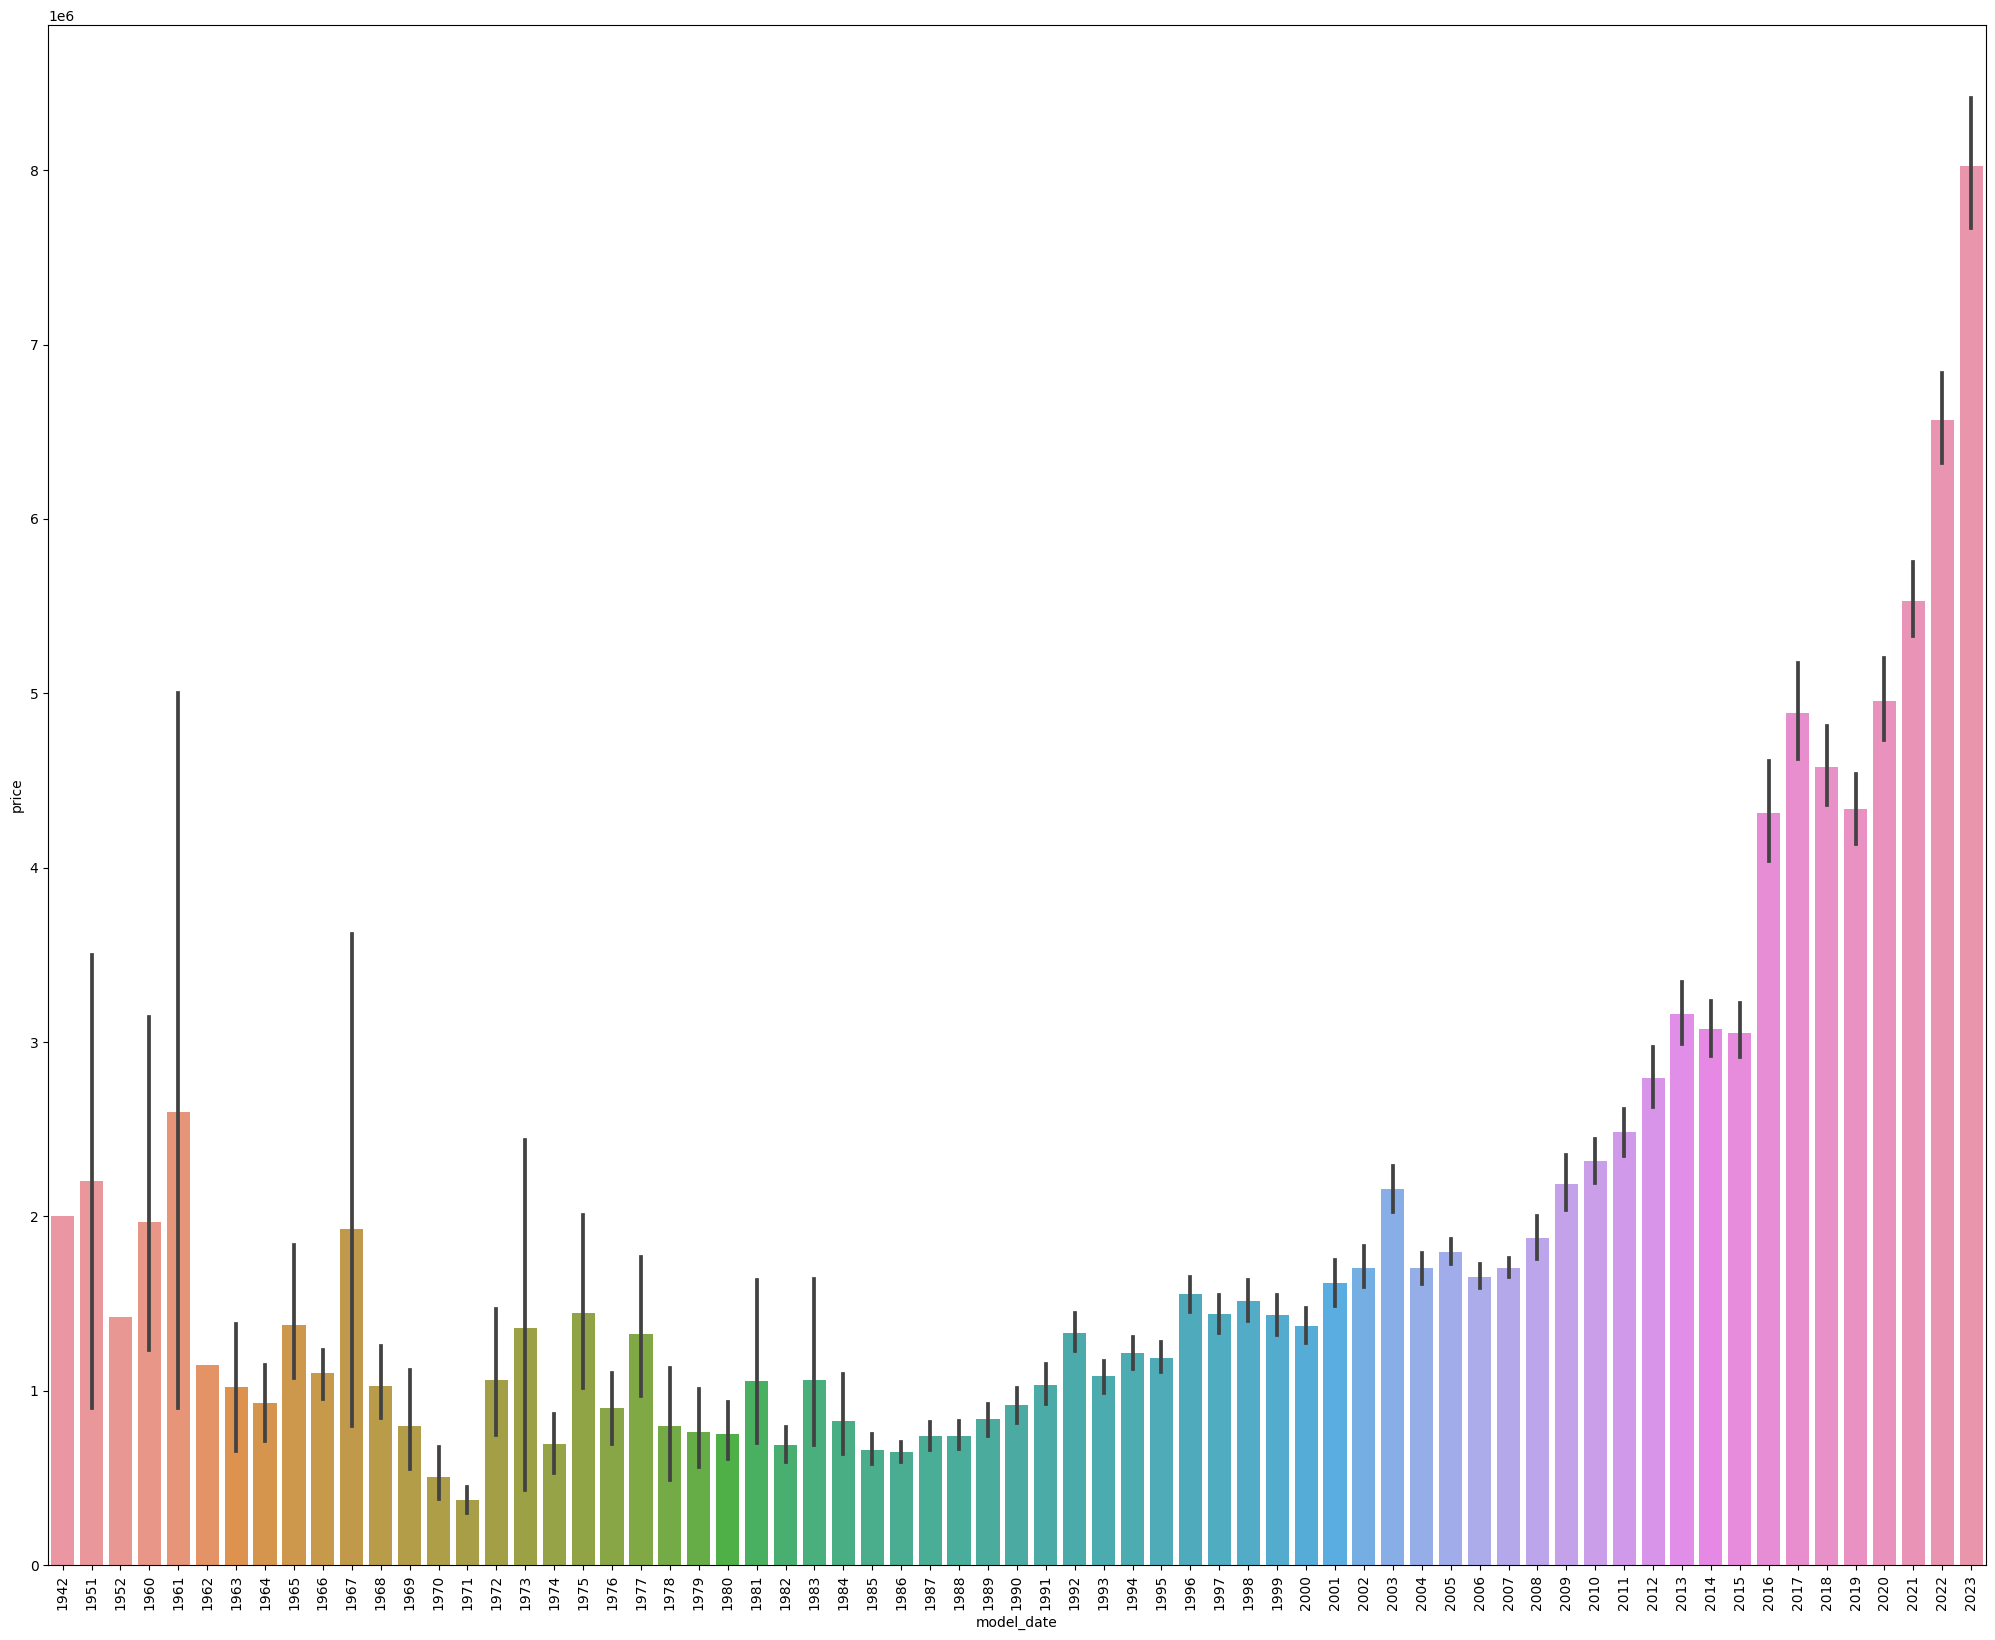

In [9]:
plt.figure(figsize=(25,20))
sns.barplot(data=df,x='model_date',y='price')
plt.xticks(rotation=90)
plt.show()
#conclusion models manufactured in 2023 are the most expensive

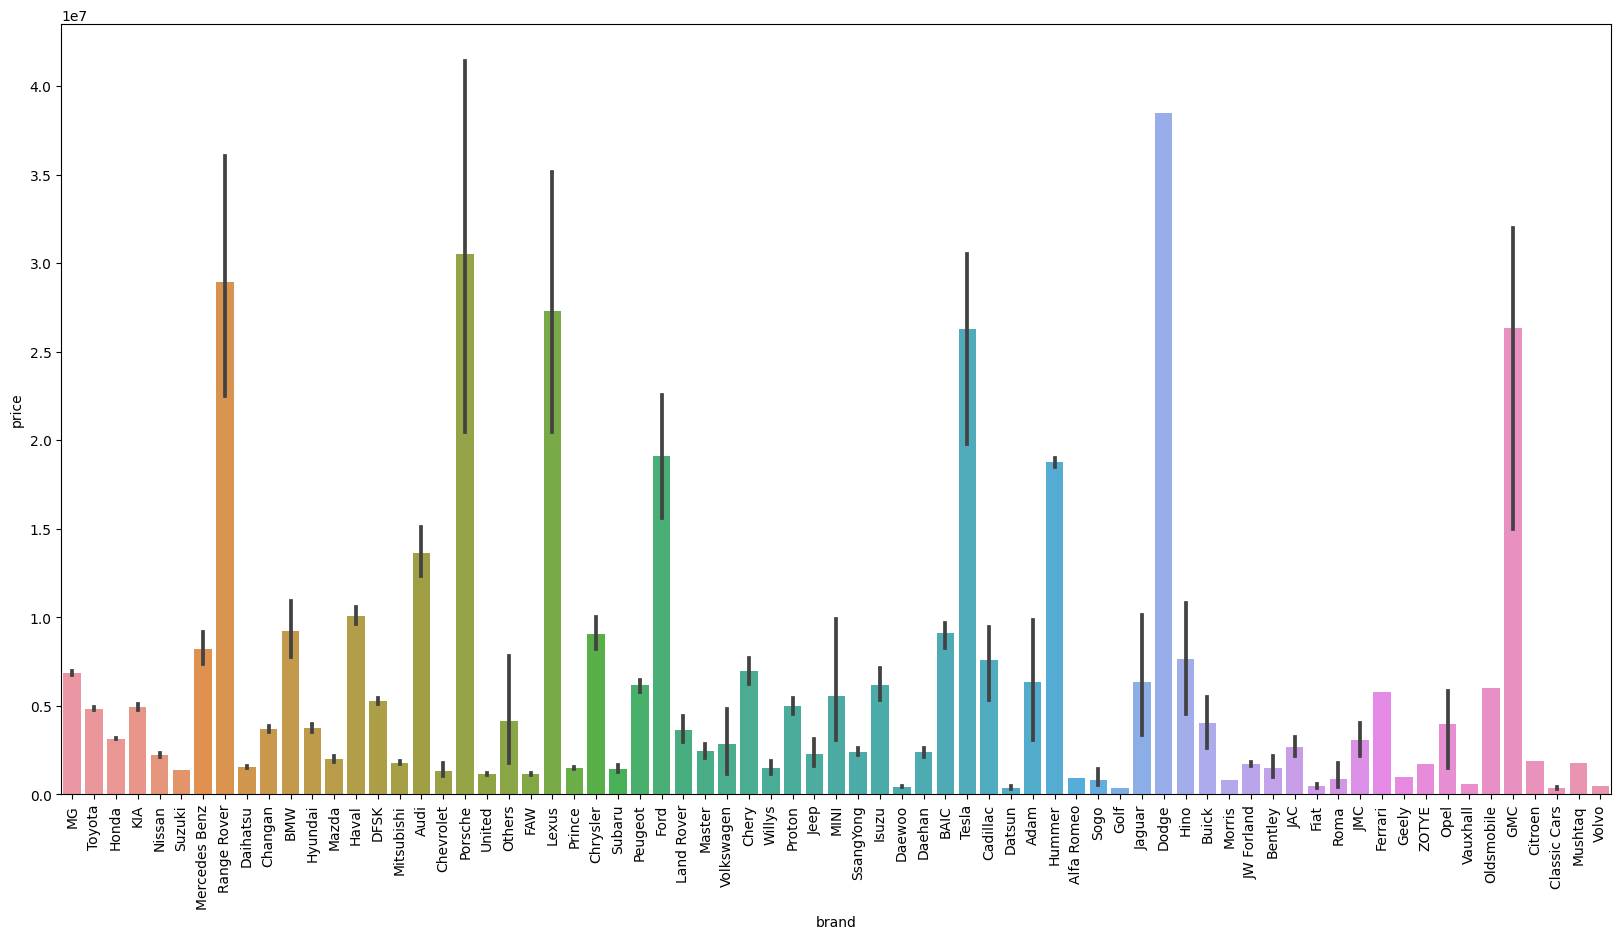

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand',y='price')
plt.xticks(rotation=90)
plt.show()
#we can see that that possible reason behind  the fact the toyota suzuki and honda are the most bought cars is that because these are very cheap as compared to other brands

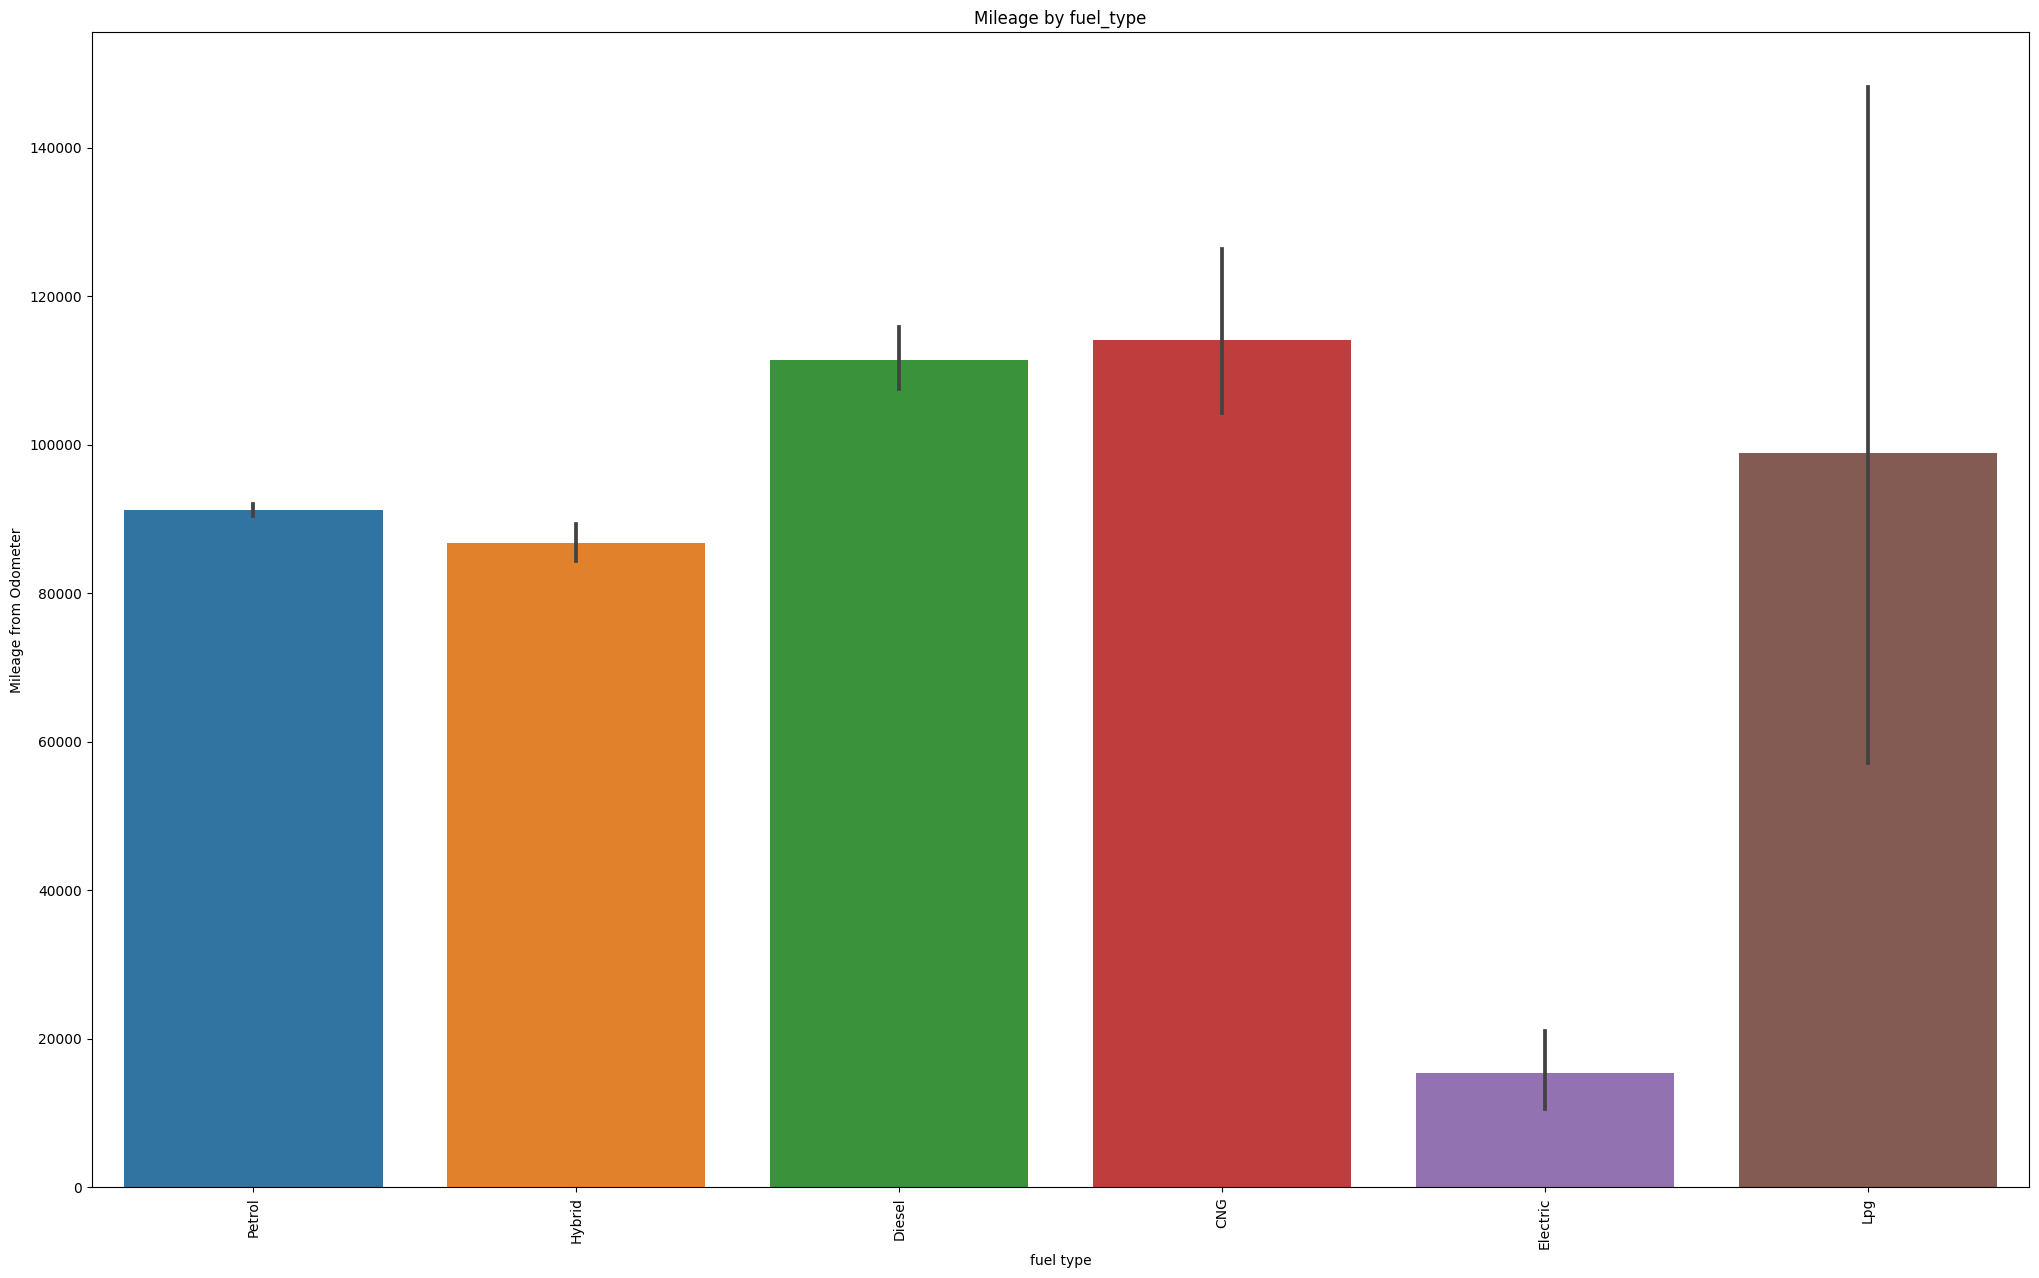

In [11]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df, x='fuel_type', y='mileage_from_odometer')
plt.xticks(rotation=90)
plt.xlabel('fuel type')
plt.ylabel('Mileage from Odometer')
plt.title('Mileage by fuel_type')
plt.show()
#conclusion cng has the highest mileage

plt.figure(figsize=(25, 15))
sns.barplot(data=df, x='fuel_type', y='model_date')
plt.xticks(rotation=90)
plt.xlabel('fuel type')
plt.ylabel('model date')
plt.title('Mileage by fuel_type')
plt.show()
#conclusion cng has the highest mileage

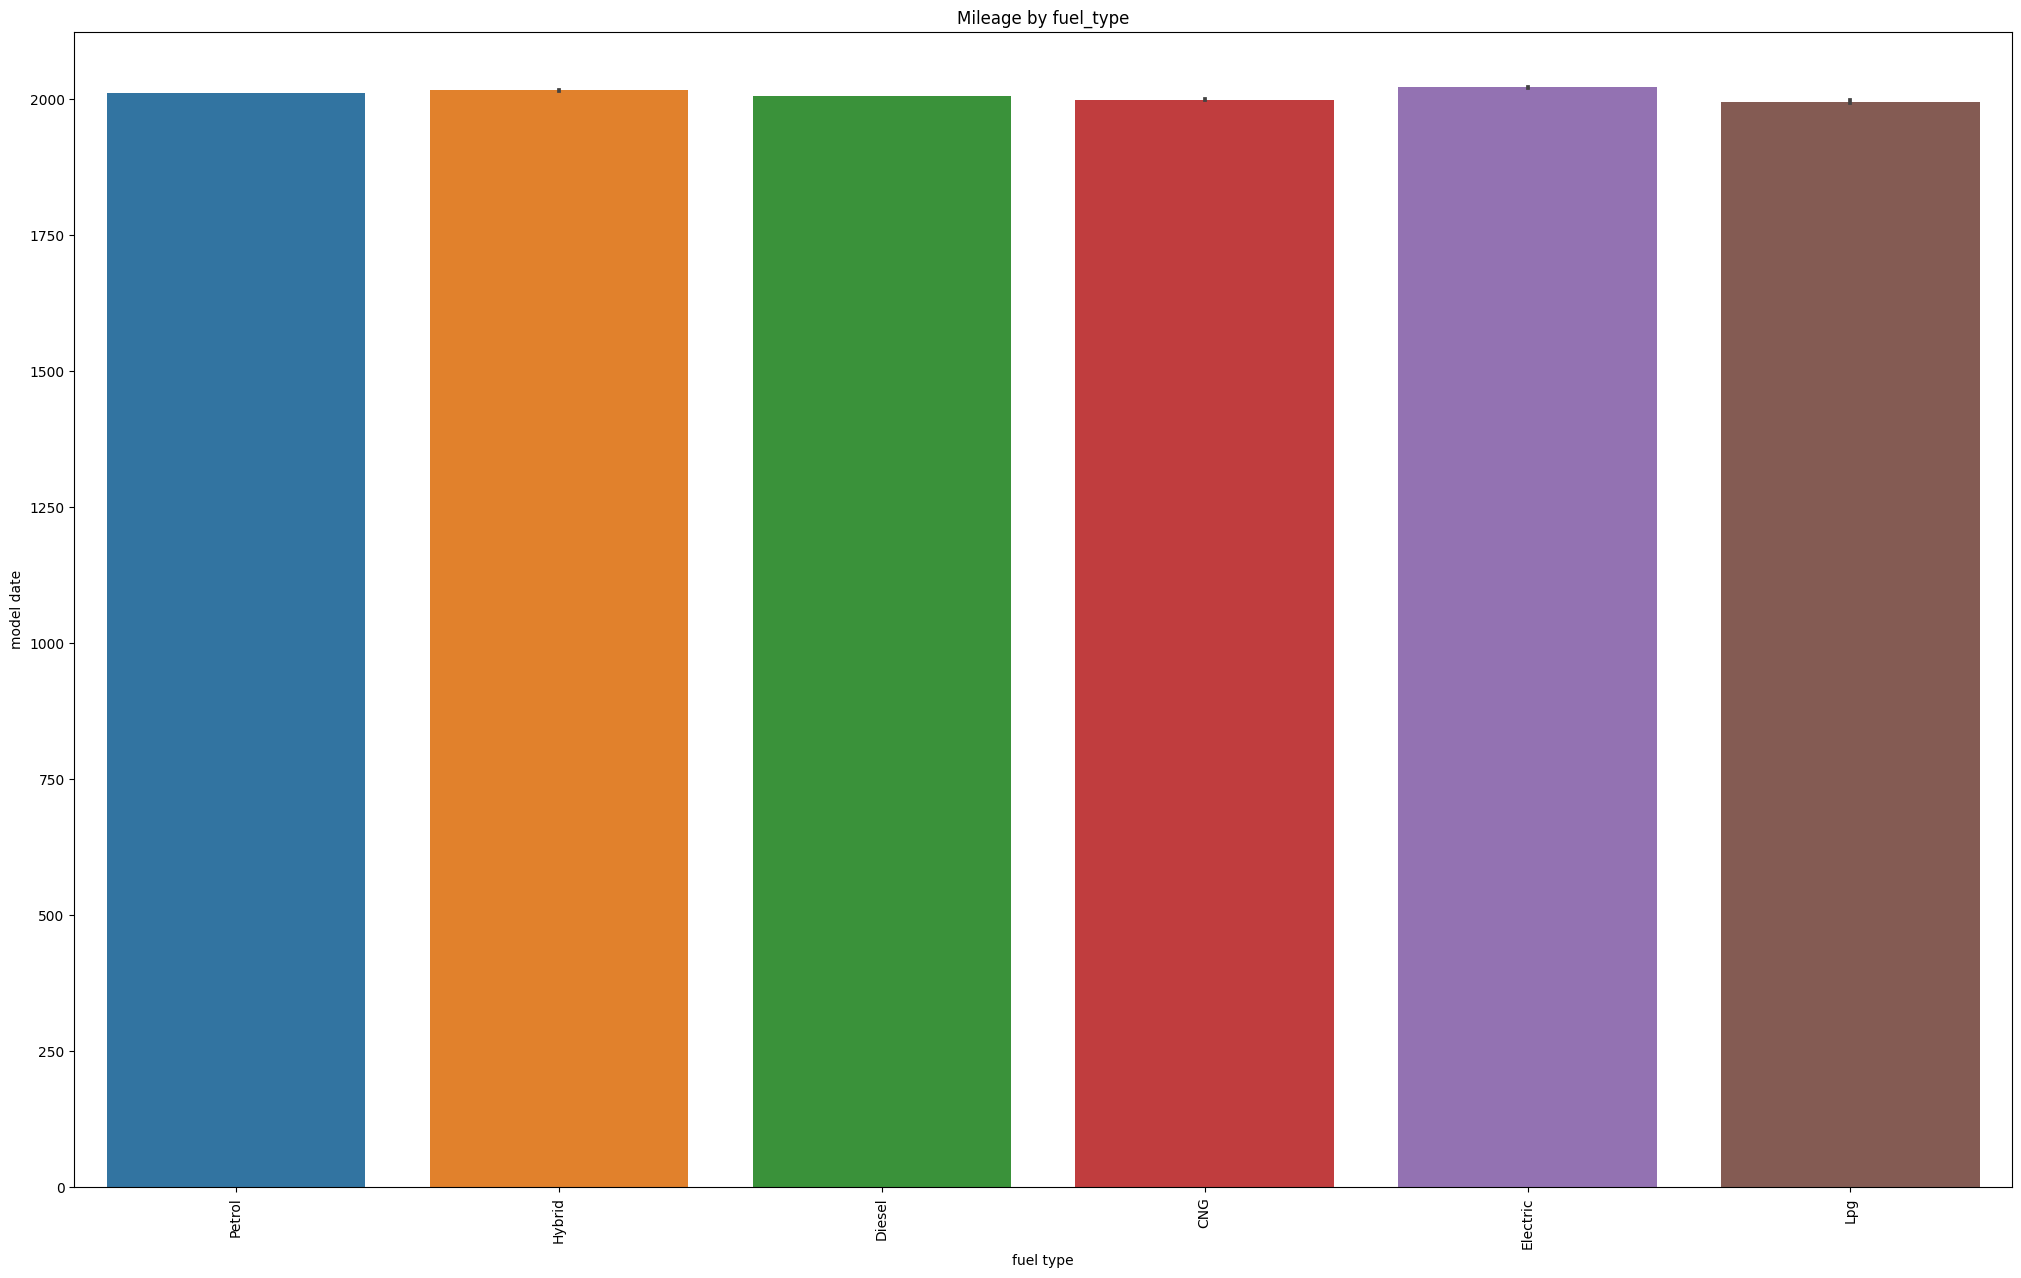

In [12]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df, x='fuel_type', y='model_date') 
plt.xticks(rotation=90) 
plt.xlabel('fuel type')
plt.ylabel('model date')
plt.title('Mileage by fuel_type') 
plt.show()

#vnf has the gioghrsdt mmileage and electric type transmission has the loswest mileage beacuse cng type transmission is is found in very old cars electric cars are very new

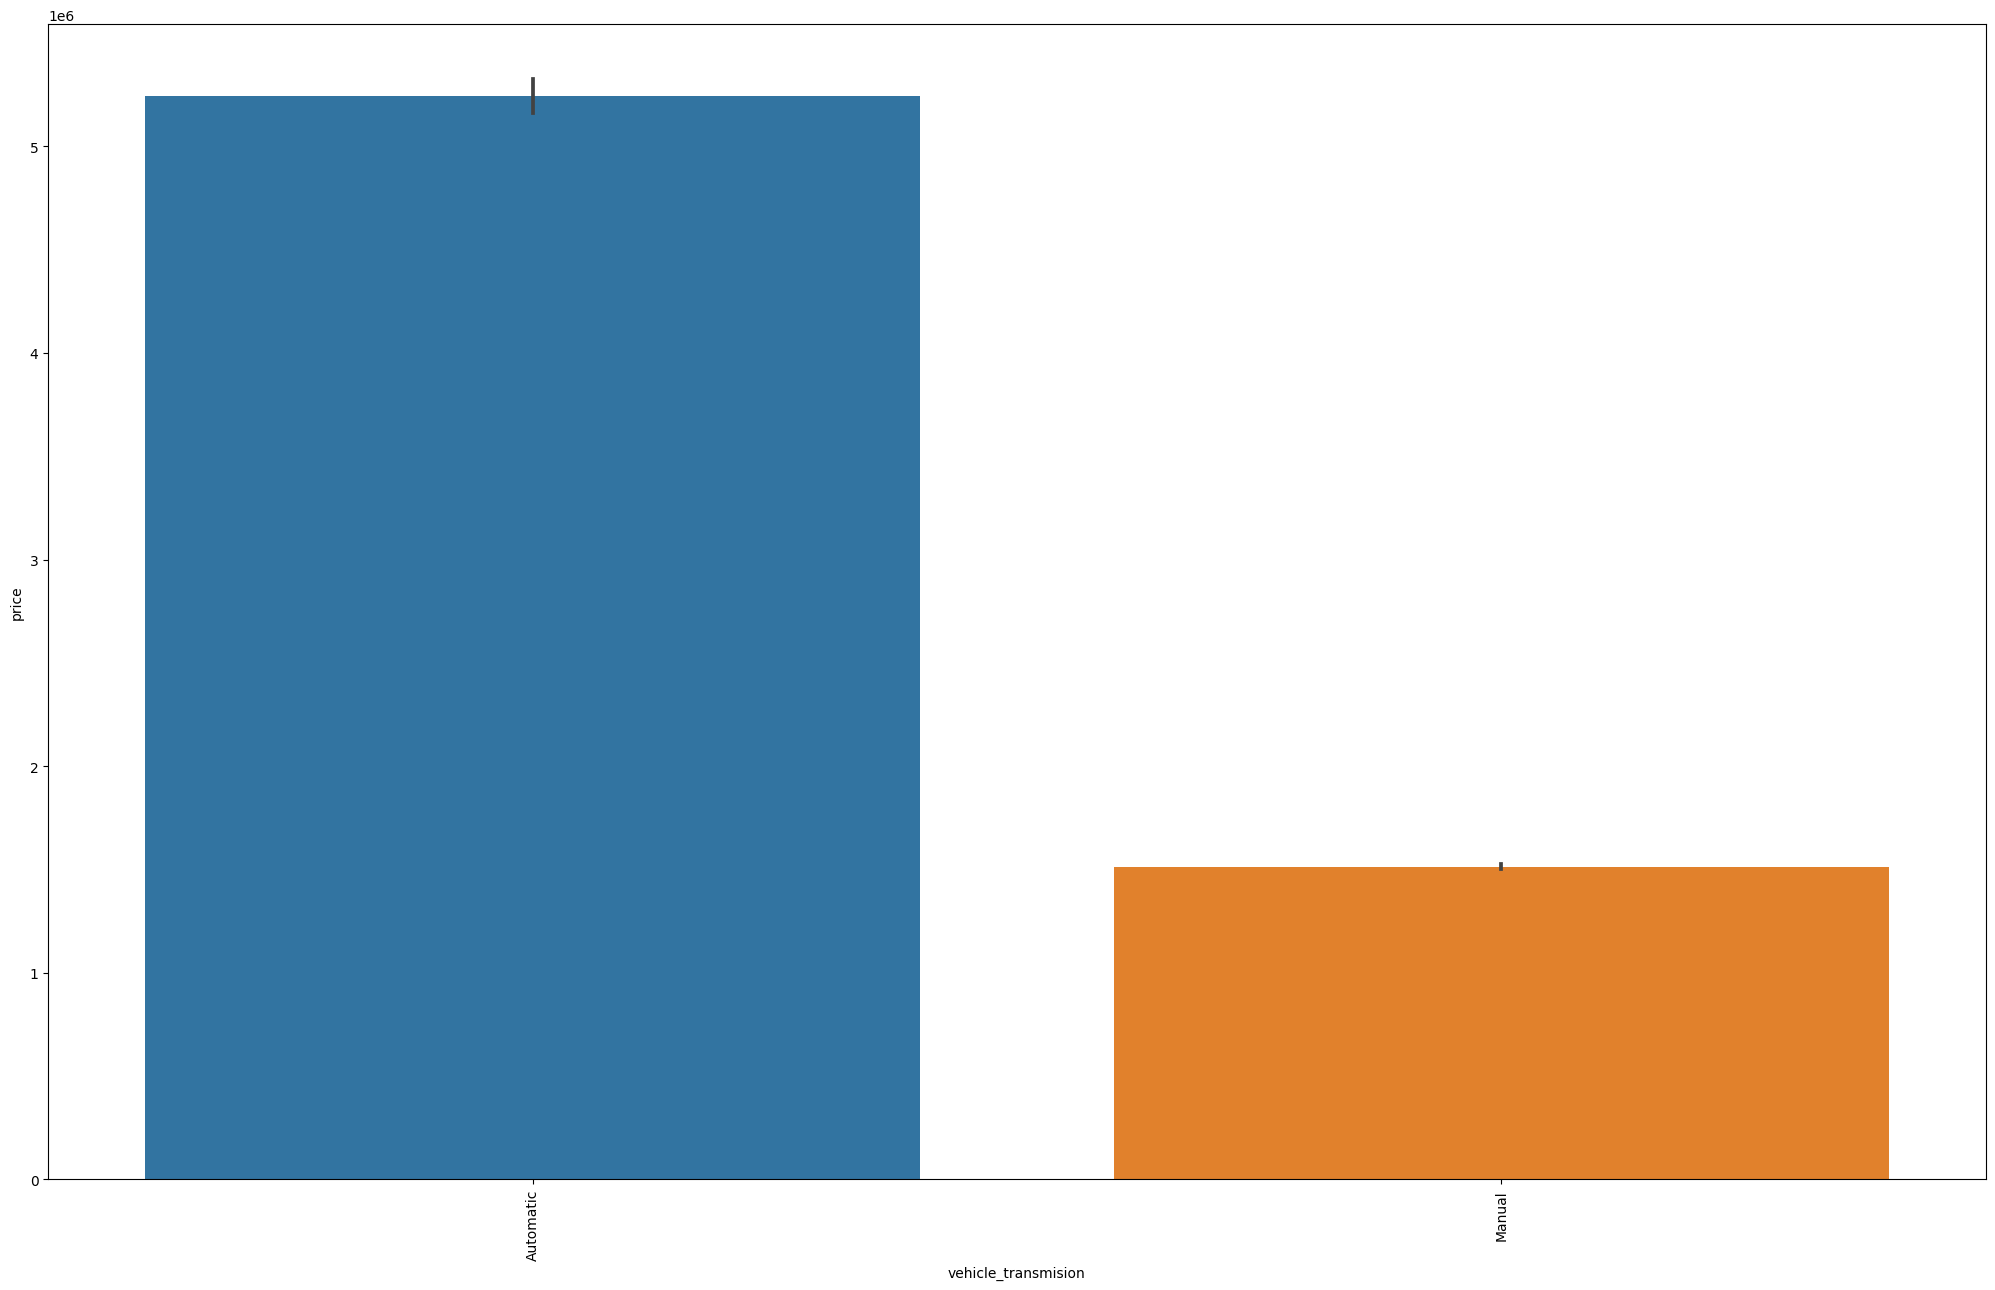

In [13]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df, x='vehicle_transmission', y='price')
plt.xticks(rotation=90)
plt.xlabel('vehicle_transmision')
plt.ylabel('price')
plt.show()
#conclusion automatic cars are way more expensive then manual cars

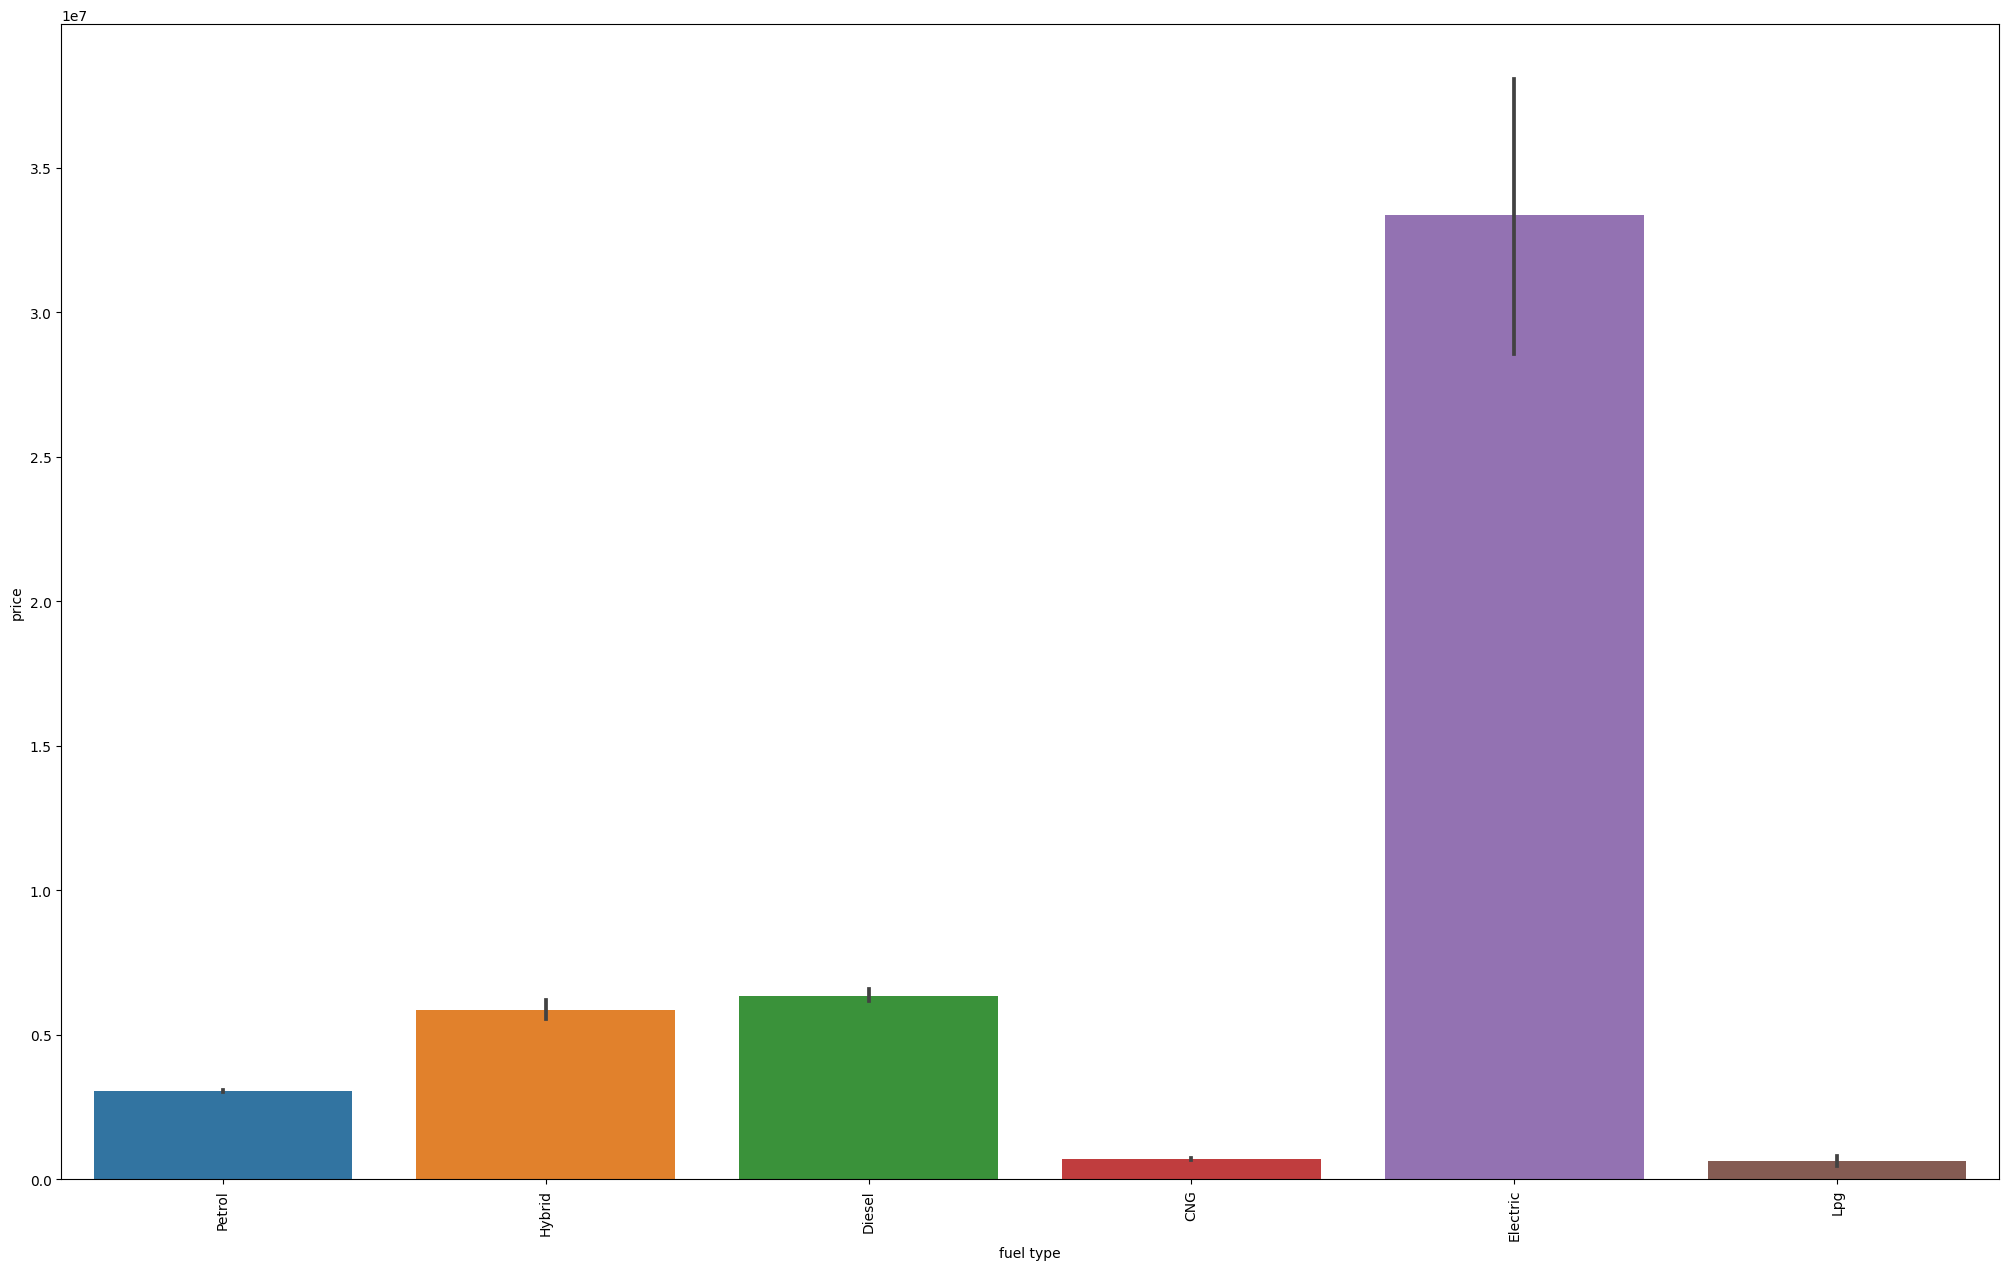

In [14]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df, x='fuel_type', y='price')
plt.xticks(rotation=90)
plt.xlabel('fuel type')
plt.ylabel('price')
plt.show()
#conclusion electric cars are the most expensive where as  lpg and cng cars are the most cheap

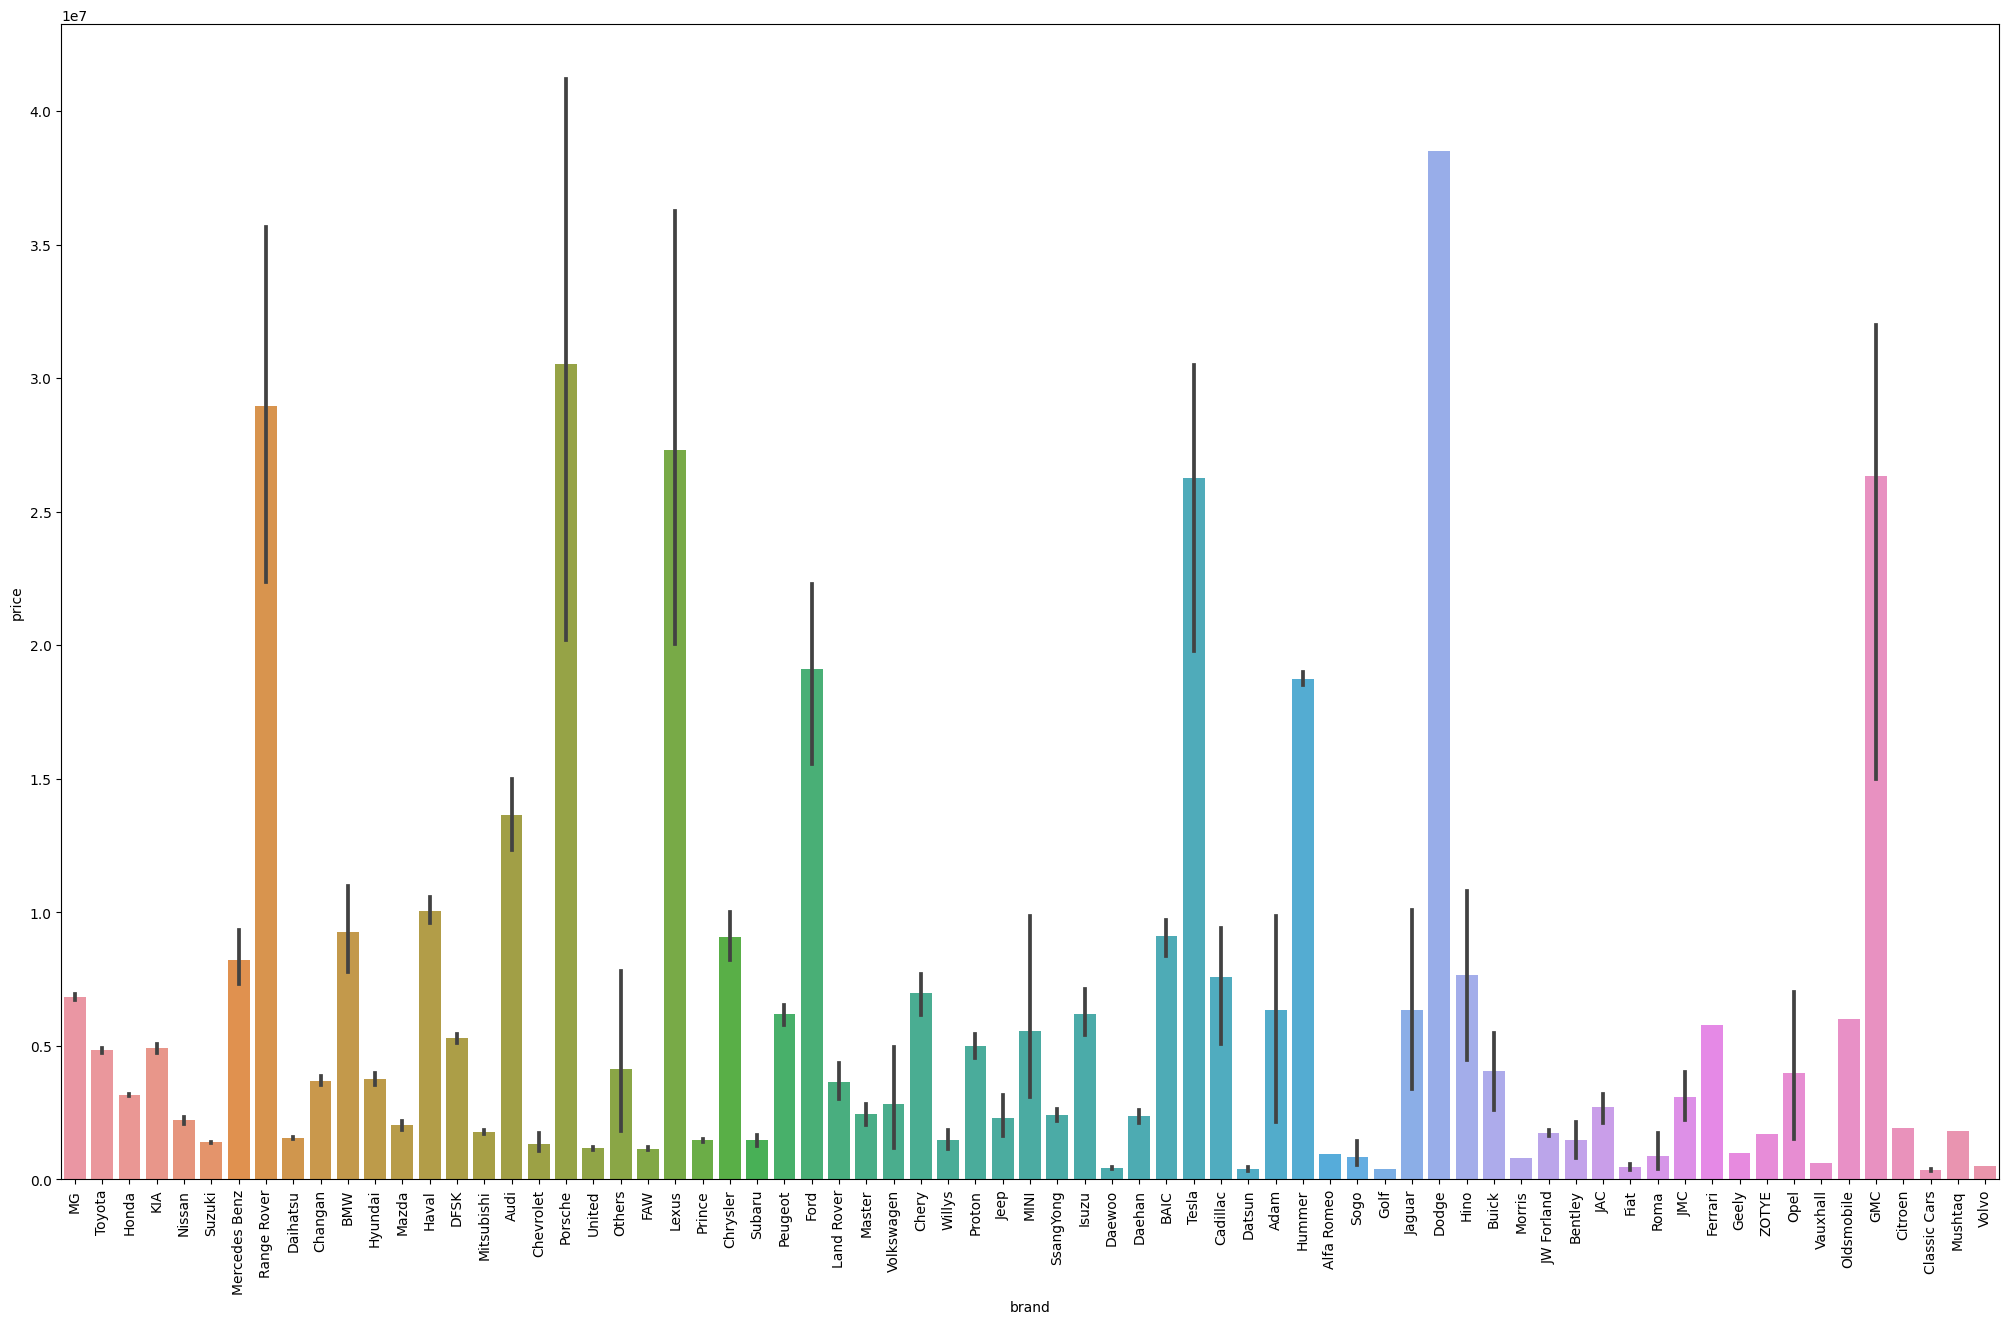

In [15]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df, x='brand', y='price')
plt.xticks(rotation=90)
plt.xlabel('brand')
plt.ylabel('price')
plt.show()
#conclusion dodge, porche and range rover are very expensive brands

<Axes: xlabel='fuel_type'>

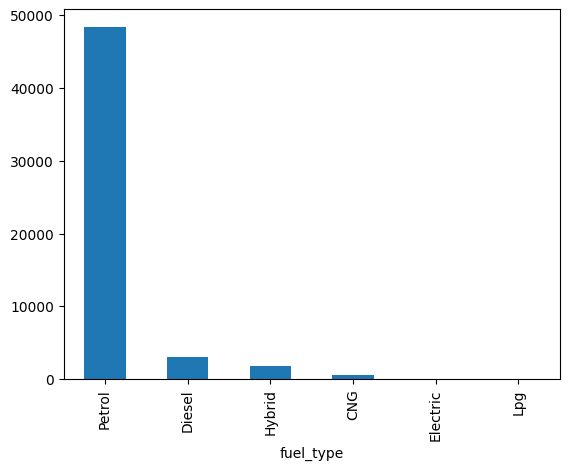

In [16]:
df['fuel_type'].value_counts().plot(kind='bar')
#conclusion majority of the cars have petrol transmission type

In [17]:
uppl=['mileage_from_odometer','price']
for i in uppl:
      q3=df[i].quantile(0.70)
      q1=df[i].quantile(0.30)
      iqr=q3-q1
      upl=q3+1.5*iqr
      limit=df[i]<upl
      df=df[limit]

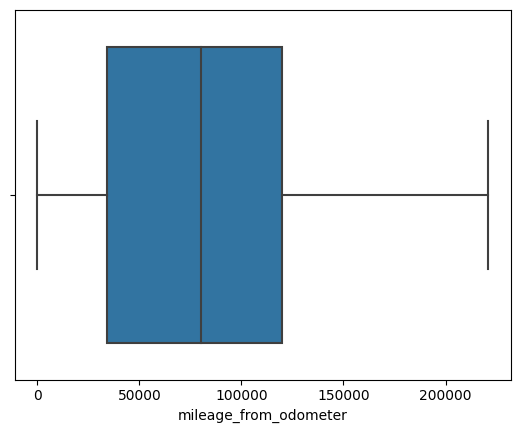

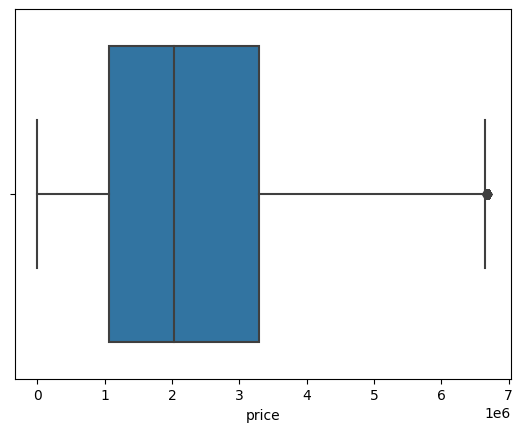

In [18]:
cols=['mileage_from_odometer','price']
for i in cols:
    sns.boxplot(data=df,x=i)
    plt.show()

In [19]:
x=df.drop(['price'],axis=1)
y=df['price']
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2,random_state=42)
xtr.shape

(36606, 7)

In [20]:
xts.shape

(9152, 7)

In [21]:
ohe=OneHotEncoder()
ohe.fit(x[['brand','fuel_type','item_condition','vehicle_transmission','model']])
ohe.categories_
ct=ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',categories=ohe.categories_),[0,1,2,5,6])
],remainder='passthrough')
rf=RandomForestRegressor()
lr=LinearRegression()
dt=DecisionTreeRegressor()
svm=SVR()
bg=BaggingRegressor()

# Linear regression

In [22]:
pipe=Pipeline([
    ('ct',ct),
    ('model',lr)
])

In [23]:
pipe.fit(xtr,ytr)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories=[array(['Adam', 'Alfa Romeo', 'Audi', 'BAIC', 'BMW', 'Bentley', 'Buick',
       'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Citroen',
       'Classic Cars', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun',
       'FAW', 'Ferrari', 'Fiat', 'Ford', 'Geely', 'Golf', 'Hino', 'Honda',
       'Hyun...
       'Thor', 'Tiggo', 'Tiida', 'Titan', 'Toppo', 'Town', 'Triton',
       'Trooper', 'Tucson', 'Uno', 'Up', 'V2', 'Vamos', 'Van', 'Vanguard',
       'Verossa', 'Vezel', 'Vigus', 'Vita', 'Vitara', 'Vitz', 'Voxy',
       'Wagon', 'Wingroad', 'Wish', 'Wrangler', 'X', 'X1', 'X200', 'X3',
       'X5', 'X70', 'Xbee', 'Xv', 'Yaris', 'Z100', 'ZS', 'Zest', 'iQ'],
      dtype=object)],
                                                                drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 6])])),
                ('model', LinearRegression())])

In [24]:
xtrpred=pipe.predict(xtr)
r2=r2_score(ytr,xtrpred)*100
print('r2 score of training data',r2)
print('mas of training data',mean_absolute_error(ytr,xtrpred))
print('mse of training data',mean_squared_error(ytr,xtrpred))
print('rmse of training data',np.sqrt(mean_squared_error(ytr,xtrpred)))

r2 score of training data 85.0682559287989
mas of training data 433261.36476767267
mse of training data 359851315202.7896
rmse of training data 599876.0832061815


In [25]:
xtspred=pipe.predict(xts)
r2s=r2_score(yts,xtspred)*100
print('r2 score of testing data',r2s)
print('mas of testing data',mean_absolute_error(yts,xtspred))
print('mse of testing data',mean_squared_error(yts,xtspred))
print('rmse of testing data',np.sqrt(mean_squared_error(yts,xtspred)))

r2 score of testing data 84.21591669885846
mas of testing data 437610.18384917435
mse of testing data 374705915508.43616
rmse of testing data 612132.2696186145


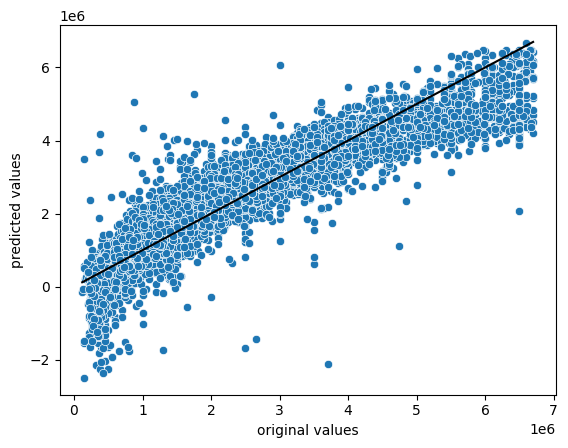

In [26]:
sns.scatterplot(x=yts,y=xtspred)
plt.xlabel('original values')
plt.ylabel('predicted values')
plt.plot([min(yts), max(yts)], [min(yts), max(yts)], linestyle='-', color='black')
plt.show()

# Dececion Tree

In [27]:
pipe=Pipeline([
    ('ct',ct),
    ('model',dt)
])

pipe.fit(xtr,ytr)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories=[array(['Adam', 'Alfa Romeo', 'Audi', 'BAIC', 'BMW', 'Bentley', 'Buick',
       'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Citroen',
       'Classic Cars', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun',
       'FAW', 'Ferrari', 'Fiat', 'Ford', 'Geely', 'Golf', 'Hino', 'Honda',
       'Hyun...
       'Thor', 'Tiggo', 'Tiida', 'Titan', 'Toppo', 'Town', 'Triton',
       'Trooper', 'Tucson', 'Uno', 'Up', 'V2', 'Vamos', 'Van', 'Vanguard',
       'Verossa', 'Vezel', 'Vigus', 'Vita', 'Vitara', 'Vitz', 'Voxy',
       'Wagon', 'Wingroad', 'Wish', 'Wrangler', 'X', 'X1', 'X200', 'X3',
       'X5', 'X70', 'Xbee', 'Xv', 'Yaris', 'Z100', 'ZS', 'Zest', 'iQ'],
      dtype=object)],
                                                                drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 6])])),
                ('model', DecisionTreeRegressor())])

In [28]:
xtrpred=pipe.predict(xtr)
r2=r2_score(ytr,xtrpred)*100
print('r2 score of training data',r2)
print('mas of training data',mean_absolute_error(ytr,xtrpred))
print('mse of training data',mean_squared_error(ytr,xtrpred))
print('rmse of training data',np.sqrt(mean_squared_error(ytr,xtrpred)))


r2 score of training data 99.11000213315664
mas of training data 60386.780680515425
mse of training data 21448727046.491497
rmse of training data 146453.8393026673


In [29]:
xtspred=pipe.predict(xts)
r2s=r2_score(yts,xtspred)*100
print('r2 score of testing data',r2s)
print('mas of testing data',mean_absolute_error(yts,xtspred))
print('mse of testing data',mean_squared_error(yts,xtspred))
print('rmse of testing data',np.sqrt(mean_squared_error(yts,xtspred)))

r2 score of testing data 90.64267827112187
mas of testing data 297398.8091357992
mse of testing data 222137943536.61862
rmse of testing data 471315.12126879464


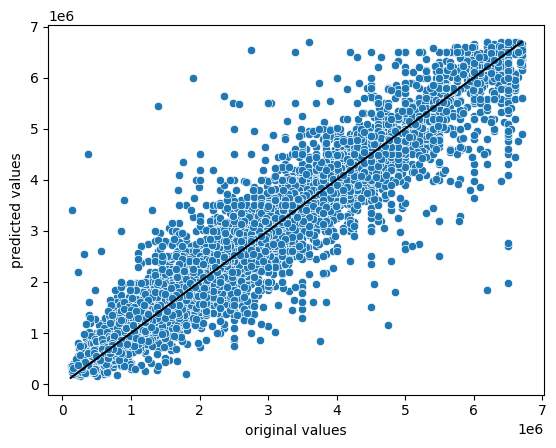

In [30]:
sns.scatterplot(x=yts,y=xtspred)
plt.xlabel('original values')
plt.ylabel('predicted values')
plt.plot([min(yts), max(yts)], [min(yts), max(yts)], linestyle='-', color='black')
plt.show()

# Random Forest Regressor

In [33]:
pipe=Pipeline([
    ('ct',ct),
    ('model',rf)
])

pipe.fit(xtr,ytr)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories=[array(['Adam', 'Alfa Romeo', 'Audi', 'BAIC', 'BMW', 'Bentley', 'Buick',
       'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Citroen',
       'Classic Cars', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun',
       'FAW', 'Ferrari', 'Fiat', 'Ford', 'Geely', 'Golf', 'Hino', 'Honda',
       'Hyun...
       'Thor', 'Tiggo', 'Tiida', 'Titan', 'Toppo', 'Town', 'Triton',
       'Trooper', 'Tucson', 'Uno', 'Up', 'V2', 'Vamos', 'Van', 'Vanguard',
       'Verossa', 'Vezel', 'Vigus', 'Vita', 'Vitara', 'Vitz', 'Voxy',
       'Wagon', 'Wingroad', 'Wish', 'Wrangler', 'X', 'X1', 'X200', 'X3',
       'X5', 'X70', 'Xbee', 'Xv', 'Yaris', 'Z100', 'ZS', 'Zest', 'iQ'],
      dtype=object)],
                                                                drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 6])])),
                ('model', RandomForestRegressor())])

In [34]:
xtrpred=pipe.predict(xtr)
r2=r2_score(ytr,xtrpred)*100
print('r2 score of training data',r2)
print('mas of training data',mean_absolute_error(ytr,xtrpred))
print('mse of training data',mean_squared_error(ytr,xtrpred))
print('rmse of training data',np.sqrt(mean_squared_error(ytr,xtrpred)))


r2 score of training data 98.35534858715049
mas of training data 125538.13563482217
mse of training data 39635689651.65213
rmse of training data 199087.14084955896


In [35]:
xtspred=pipe.predict(xts)
r2s=r2_score(yts,xtspred)*100
print('r2 score of testing data',r2s)
print('mas of testing data',mean_absolute_error(yts,xtspred))
print('mse of testing data',mean_squared_error(yts,xtspred))
print('rmse of testing data',np.sqrt(mean_squared_error(yts,xtspred)))

r2 score of testing data 92.91998973139202
mas of testing data 259389.20217796357
mse of testing data 168075755740.34235
rmse of testing data 409970.4327635621


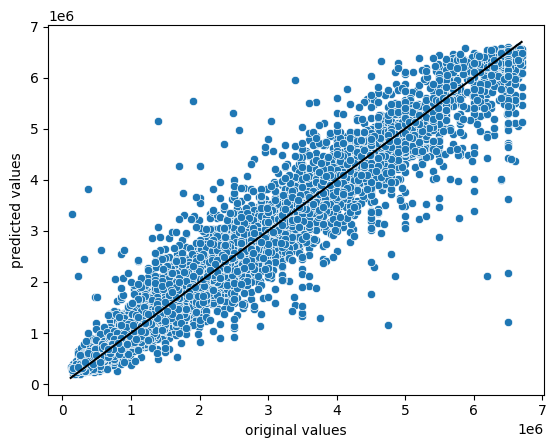

In [36]:
sns.scatterplot(x=yts,y=xtspred)
plt.xlabel('original values')
plt.ylabel('predicted values')
plt.plot([min(yts), max(yts)], [min(yts), max(yts)], linestyle='-', color='black')
plt.show()